In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv(r'C:\Users\Elsaka\AMIT\pandas\Data from AMIT\weatherHistory.csv')
df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [3]:
df.shape

(96453, 12)

In [4]:
def columns_info(df):
    colms = []
    dtypes = []
    unique = []
    nunique = []
    nulls = []
    
    for colm in df.columns:
        colms.append(colm)
        dtypes.append(df[colm].dtypes)
        unique.append(df[colm].unique())
        nunique.append(df[colm].nunique())
        nulls.append(df[colm].isna().sum())
        
    return pd.DataFrame({'Columns':colms ,
                         'Data Types': dtypes,
                         'Unique values':unique,
                         'Number of unique': nunique,
                         'missing values':nulls})  
columns_info(df)

,Columns,Data Types,Unique values,Number of unique,missing values
0,Formatted Date,object,"[2006-04-01 00:00:00.000 +0200, 2006-04-01 01:...",96429,0
1,Summary,object,"[Partly Cloudy, Mostly Cloudy, Overcast, Foggy...",27,0
2,Precip Type,object,"[rain, snow, nan]",2,517
3,Temperature (C),float64,"[9.47222222222222, 9.355555555555558, 9.377777...",7574,0
4,Apparent Temperature (C),float64,"[7.388888888888887, 7.227777777777776, 9.37777...",8984,0
5,Humidity,float64,"[0.89, 0.86, 0.83, 0.85, 0.95, 0.82, 0.72, 0.6...",90,0
6,Wind Speed (km/h),float64,"[14.1197, 14.2646, 3.9284, 14.1036, 11.0446, 1...",2484,0
7,Wind Bearing (degrees),float64,"[251.0, 259.0, 204.0, 269.0, 258.0, 260.0, 279...",360,0
8,Visibility (km),float64,"[15.826300000000002, 14.9569, 9.982, 11.2056, ...",949,0
9,Loud Cover,float64,[0.0],1,0


#  Outlier Function with (I Q R _ stander deviation) 

In [5]:
def check_outliers(colm,df):
    q1=df[colm].quantile(0.25)
    q3=df[colm].quantile(0.75)
    iqr=q3-q1
    lower_bound=q1-1.5*iqr
    upper_bound=q3+1.5*iqr
    outliers = []
    
    for i in range(len(df)):
        value = df.loc[i,colm]
        if value > upper_bound or value < lower_bound :
            outliers.append(value)
    return outliers

In [6]:
def handle_outliers(colm,df):
    q1=df[colm].quantile(0.25)
    q3=df[colm].quantile(0.75)
    iqr=q3-q1
    lower_bound= q1-1.5*iqr
    upper_bound= q3+1.5*iqr
    
    for i in range (len(df)):
        if df.loc[i,colm] < lower_bound :
            df.loc[i,colm] = lower_bound
        elif  df.loc[i,colm] > upper_bound:
             df.loc[i,colm] = upper_bound 
                
    
    

 # check if we have duplicated rows

In [7]:
df.duplicated().sum()

24

In [8]:
df.drop_duplicates(inplace=True)
df.reset_index(inplace=True)
df.drop('index',axis=1,inplace=True)

In [9]:
df.shape

(96429, 12)

# 1- Formatted Date

In [10]:
df['Formatted Date'].unique()

array(['2006-04-01 00:00:00.000 +0200', '2006-04-01 01:00:00.000 +0200',
       '2006-04-01 02:00:00.000 +0200', ...,
       '2016-09-09 21:00:00.000 +0200', '2016-09-09 22:00:00.000 +0200',
       '2016-09-09 23:00:00.000 +0200'], dtype=object)

In [11]:
df['Year_Date']  , df['month_Date'], df['Day_Date'] =df['Formatted Date'].str.split('-' ,3).str


In [12]:
df.drop('Formatted Date' , axis =1 ,inplace =True)

In [13]:
df.head()

,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary,Year_Date,month_Date,Day_Date
0,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.,2006,04,01 00:00:00.000 +0200
1,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.,2006,04,01 01:00:00.000 +0200
2,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.,2006,04,01 02:00:00.000 +0200
3,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.,2006,04,01 03:00:00.000 +0200
4,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.,2006,04,01 04:00:00.000 +0200


In [14]:
df.drop('Day_Date' , axis =1 ,inplace =True)

In [15]:
df['Year_Date'] = df['Year_Date'].astype(int)
df['month_Date'] = df['month_Date'].astype(int)

In [16]:
df.head()

,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary,Year_Date,month_Date
0,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.,2006,4
1,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.,2006,4
2,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.,2006,4
3,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.,2006,4
4,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.,2006,4


In [17]:
check_outliers('Year_Date' , df)

[]

In [18]:
check_outliers('month_Date' , df)

[]

# 2- Summary

In [19]:
df['Summary'].unique()

array(['Partly Cloudy', 'Mostly Cloudy', 'Overcast', 'Foggy',
       'Breezy and Mostly Cloudy', 'Clear', 'Breezy and Partly Cloudy',
       'Breezy and Overcast', 'Humid and Mostly Cloudy',
       'Humid and Partly Cloudy', 'Windy and Foggy', 'Windy and Overcast',
       'Breezy and Foggy', 'Windy and Partly Cloudy', 'Breezy',
       'Dry and Partly Cloudy', 'Windy and Mostly Cloudy',
       'Dangerously Windy and Partly Cloudy', 'Dry', 'Windy',
       'Humid and Overcast', 'Light Rain', 'Drizzle', 'Windy and Dry',
       'Dry and Mostly Cloudy', 'Breezy and Dry', 'Rain'], dtype=object)

In [20]:
df['Summary'].nunique()

27

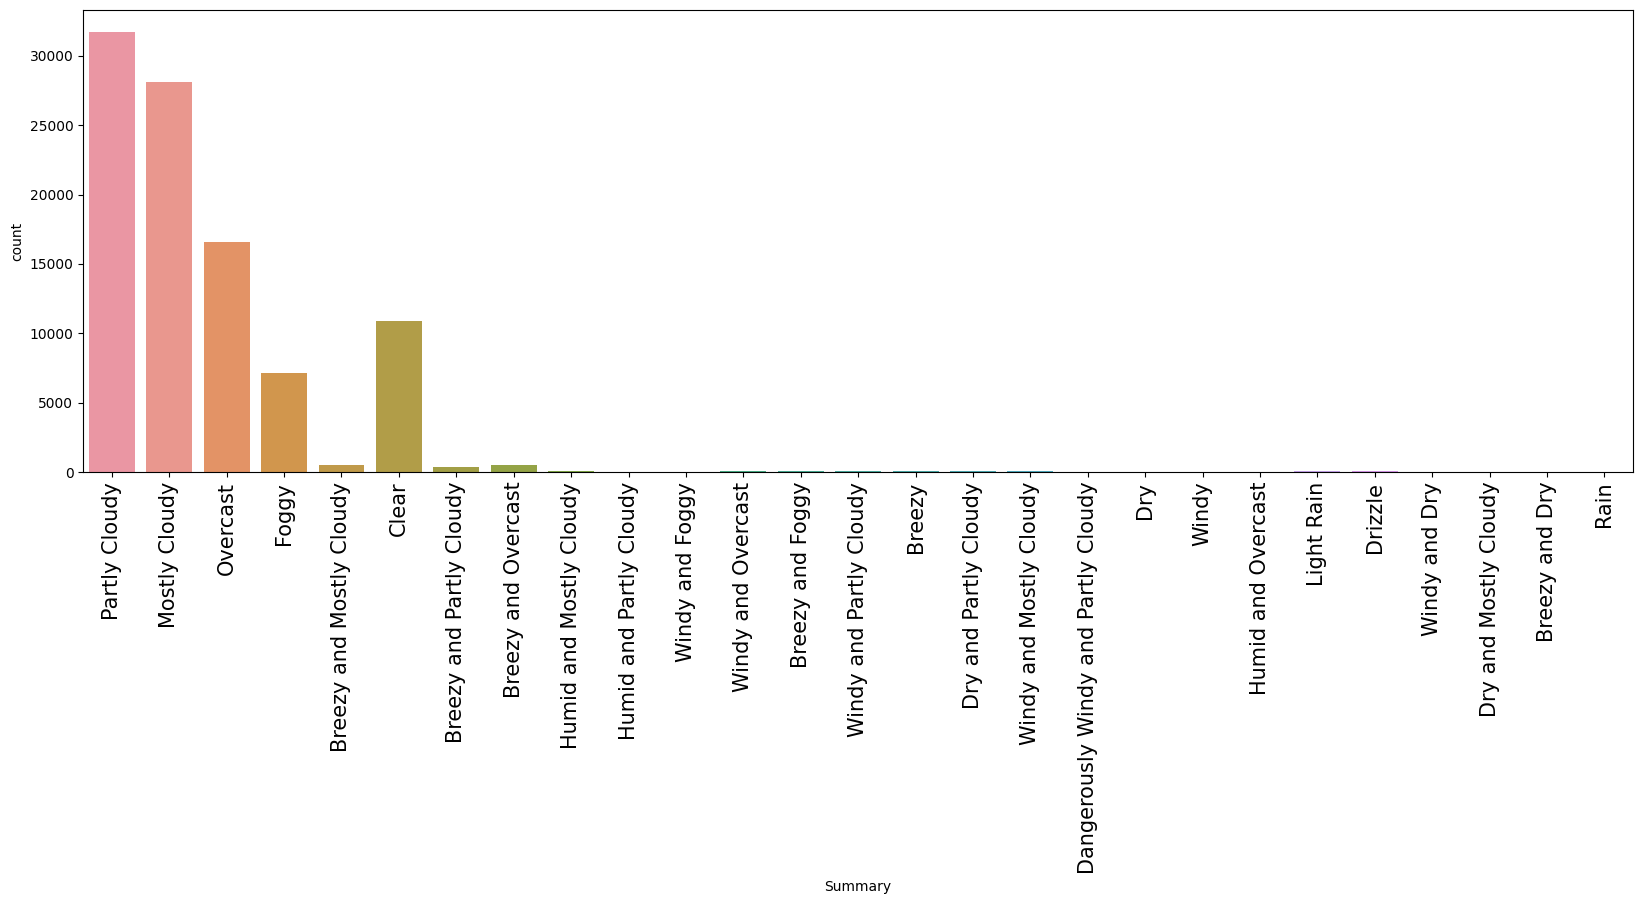

In [21]:
plt.figure(figsize = (20,6))
plt.xticks(fontsize =15 ,rotation = 'vertical' )
sns.countplot(x=df['Summary'] ,data =df)
plt.show()

>- Most of the time the weather is partly cloudy

# 3- Precip Type

In [22]:
df['Precip Type'].unique()

array(['rain', 'snow', nan], dtype=object)

>- we have nan vaues

In [23]:
df['Precip Type'].value_counts()

rain    85200
snow    10712
Name: Precip Type, dtype: int64

>- this frature is categorical so should fix the nan values by median 

In [24]:
mode = df['Precip Type'].mode()[0]
df['Precip Type'].fillna(mode , inplace=True)

In [25]:
df['Precip Type'].value_counts()

rain    85717
snow    10712
Name: Precip Type, dtype: int64

In [26]:
df['Precip Type'].isna(). sum()

0

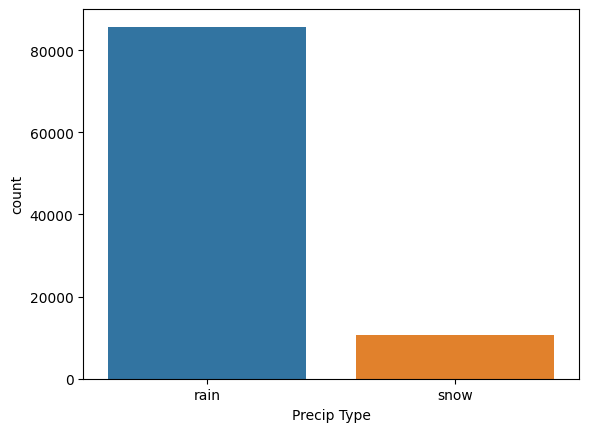

In [27]:
sns.countplot(x =df['Precip Type'] , data = df)
plt.show()

In [28]:
df['Precip Type'] = df['Precip Type'] . map({'rain' :0 , 'snow' :1})

>- As we can see, the weather is rarely snow

In [29]:
check_outliers('Precip Type' , df)

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,


In [30]:
handle_outliers('Precip Type' , df)

In [31]:
check_outliers('Precip Type' , df)

[]

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96429 entries, 0 to 96428
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Summary                   96429 non-null  object 
 1   Precip Type               96429 non-null  int64  
 2   Temperature (C)           96429 non-null  float64
 3   Apparent Temperature (C)  96429 non-null  float64
 4   Humidity                  96429 non-null  float64
 5   Wind Speed (km/h)         96429 non-null  float64
 6   Wind Bearing (degrees)    96429 non-null  float64
 7   Visibility (km)           96429 non-null  float64
 8   Loud Cover                96429 non-null  float64
 9   Pressure (millibars)      96429 non-null  float64
 10  Daily Summary             96429 non-null  object 
 11  Year_Date                 96429 non-null  int32  
 12  month_Date                96429 non-null  int32  
dtypes: float64(8), int32(2), int64(1), object(2)
memory usage: 8.

# 4- Temperature (C)

In [33]:
df['Temperature (C)'].unique()

array([ 9.47222222,  9.35555556,  9.37777778, ..., 28.47222222,
       28.33888889, 30.60555556])

In [34]:
df['Temperature (C)'].nunique()

7574

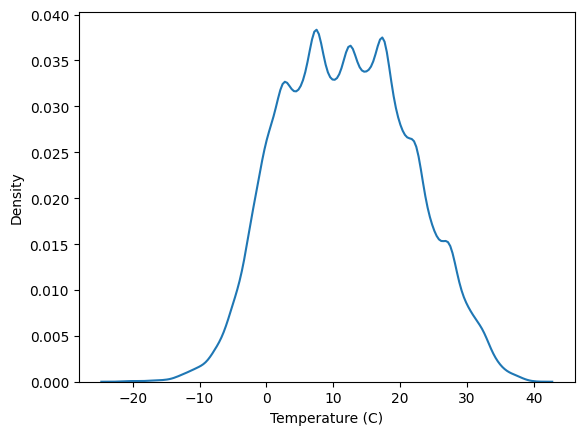

In [35]:
sns.kdeplot(x =df['Temperature (C)'] ,data = df)
plt.show()

>- We also see the temperature between -10 to 30

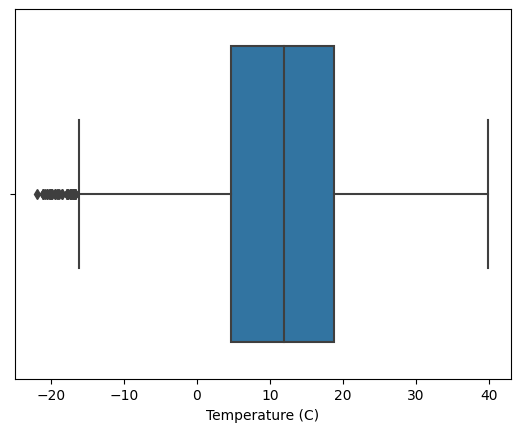

In [36]:
sns.boxplot(x =df['Temperature (C)'] ,data = df)
plt.show()

In [37]:
check_outliers('Temperature (C)' , df)

[-16.666666666666668,
 -16.666666666666668,
 -16.666666666666668,
 -17.655555555555555,
 -20.0,
 -20.0,
 -21.822222222222223,
 -20.0,
 -17.22222222222222,
 -16.91111111111111,
 -17.22222222222222,
 -17.22222222222222,
 -19.02777777777778,
 -19.444444444444443,
 -20.0,
 -19.166666666666668,
 -20.55555555555556,
 -16.666666666666668,
 -16.705555555555556,
 -17.77777777777778,
 -16.894444444444446,
 -17.22222222222222,
 -17.22222222222222,
 -16.87777777777778,
 -17.77777777777778,
 -20.0,
 -18.51111111111111,
 -17.77777777777778,
 -17.294444444444444,
 -17.22222222222222,
 -17.22222222222222,
 -19.77777777777778,
 -20.0,
 -19.444444444444443,
 -20.05,
 -21.11111111111111,
 -20.55555555555556,
 -20.27777777777778,
 -21.11111111111111,
 -21.11111111111111,
 -20.78333333333333,
 -18.88888888888889,
 -18.405555555555555,
 -17.77777777777778]

In [38]:
handle_outliers('Temperature (C)' , df)

In [39]:
check_outliers('Temperature (C)' , df)

[]

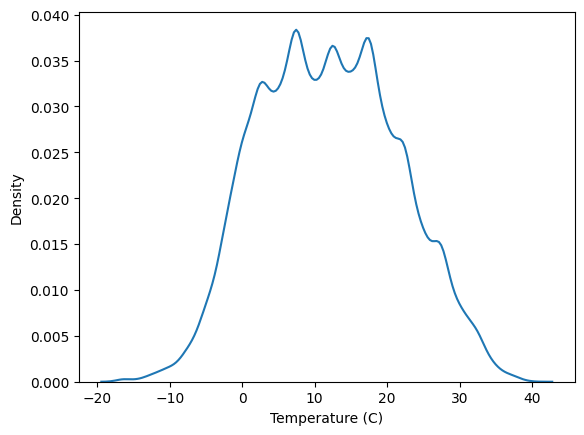

In [40]:
sns.kdeplot(x =df['Temperature (C)'] ,data = df)
plt.show()

>- It hasn't changed much as we can see the temperature is still between -10 to 30

# 5- Humidity

In [41]:
df['Humidity'].unique()

array([0.89, 0.86, 0.83, 0.85, 0.95, 0.82, 0.72, 0.67, 0.54, 0.55, 0.51,
       0.47, 0.46, 0.6 , 0.63, 0.69, 0.7 , 0.77, 0.76, 0.79, 0.62, 0.66,
       0.8 , 0.78, 0.61, 0.52, 0.4 , 0.37, 0.36, 0.43, 0.5 , 0.53, 0.58,
       0.59, 0.87, 0.93, 0.84, 0.73, 0.71, 0.74, 0.81, 0.9 , 0.99, 0.96,
       0.75, 0.88, 0.65, 0.91, 0.94, 0.92, 0.44, 0.56, 0.68, 0.64, 0.48,
       0.57, 0.98, 1.  , 0.38, 0.41, 0.45, 0.49, 0.32, 0.42, 0.35, 0.39,
       0.97, 0.34, 0.33, 0.31, 0.3 , 0.29, 0.27, 0.28, 0.26, 0.24, 0.25,
       0.23, 0.19, 0.17, 0.2 , 0.15, 0.18, 0.22, 0.14, 0.21, 0.16, 0.13,
       0.  , 0.12])

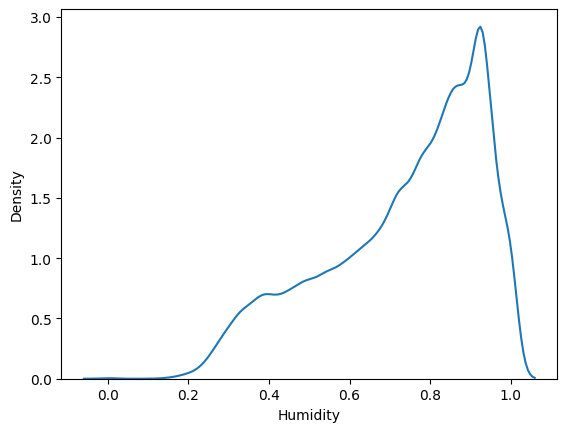

In [42]:
sns.kdeplot(x =df['Humidity'] ,data = df)
plt.show()

>- Humidity did not exceed 1% from 2006 to 2016

In [43]:
check_outliers('Humidity' , df)

[0.15,
 0.15,
 0.14,
 0.15,
 0.14,
 0.15,
 0.14,
 0.16,
 0.15,
 0.16,
 0.16,
 0.15,
 0.16,
 0.13,
 0.15,
 0.16,
 0.16,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.16,
 0.12,
 0.15,
 0.14,
 0.16,
 0.15,
 0.15]

In [44]:
handle_outliers('Humidity' , df)

In [45]:
check_outliers('Humidity' , df)

[]

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96429 entries, 0 to 96428
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Summary                   96429 non-null  object 
 1   Precip Type               96429 non-null  int64  
 2   Temperature (C)           96429 non-null  float64
 3   Apparent Temperature (C)  96429 non-null  float64
 4   Humidity                  96429 non-null  float64
 5   Wind Speed (km/h)         96429 non-null  float64
 6   Wind Bearing (degrees)    96429 non-null  float64
 7   Visibility (km)           96429 non-null  float64
 8   Loud Cover                96429 non-null  float64
 9   Pressure (millibars)      96429 non-null  float64
 10  Daily Summary             96429 non-null  object 
 11  Year_Date                 96429 non-null  int32  
 12  month_Date                96429 non-null  int32  
dtypes: float64(8), int32(2), int64(1), object(2)
memory usage: 8.

# 6- Wind Speed (km/h)

In [47]:
df['Wind Speed (km/h)'].unique()

array([14.1197, 14.2646,  3.9284, ..., 37.0622, 35.5971, 30.751 ])

In [48]:
df['Wind Speed (km/h)'].nunique()

2484

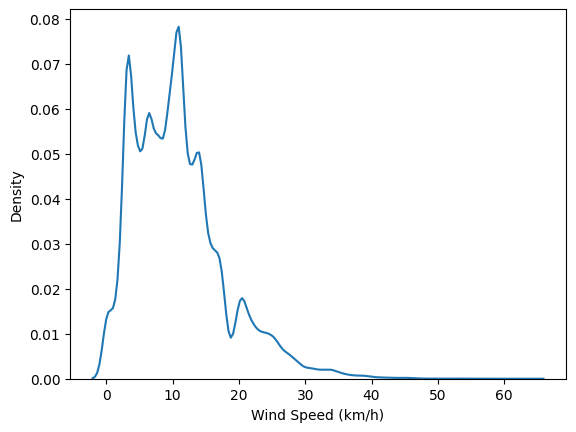

In [49]:
sns.kdeplot(x = df['Wind Speed (km/h)'] , data = df)
plt.show()

>- The wind speed most of the time is between 0 to 10

In [50]:
check_outliers('Wind Speed (km/h)' , df)

[28.3682,
 26.9031,
 28.1267,
 27.8691,
 28.0945,
 27.9818,
 30.863700000000005,
 32.1678,
 28.33600000000001,
 29.833300000000005,
 28.480900000000005,
 28.5131,
 27.37,
 26.726000000000003,
 28.0623,
 27.9013,
 26.838700000000003,
 26.7743,
 30.8315,
 27.9013,
 33.9066,
 27.7403,
 28.3199,
 27.7242,
 30.525600000000004,
 36.386,
 27.1768,
 30.412900000000004,
 27.6276,
 26.7421,
 29.833300000000005,
 27.9013,
 27.5954,
 28.5292,
 26.9353,
 28.5292,
 29.463000000000005,
 26.8226,
 27.4666,
 33.2304,
 30.3968,
 33.48800000000001,
 28.33600000000001,
 32.6025,
 28.5775,
 31.5721,
 28.2394,
 29.0122,
 45.9333,
 28.2877,
 32.8923,
 36.273300000000006,
 28.3682,
 33.1016,
 34.37350000000001,
 36.9495,
 36.1767,
 34.486200000000004,
 28.7063,
 29.543500000000005,
 27.9496,
 33.6007,
 28.98,
 39.3323,
 45.530800000000006,
 42.6328,
 39.4289,
 44.8868,
 39.3645,
 42.4718,
 43.8564,
 37.4808,
 38.0765,
 36.627500000000005,
 34.66330000000001,
 37.9316,
 34.7921,
 29.4147,
 30.557800000000004,


In [51]:
handle_outliers('Wind Speed (km/h)' , df)

In [52]:
check_outliers('Wind Speed (km/h)' , df)

[]

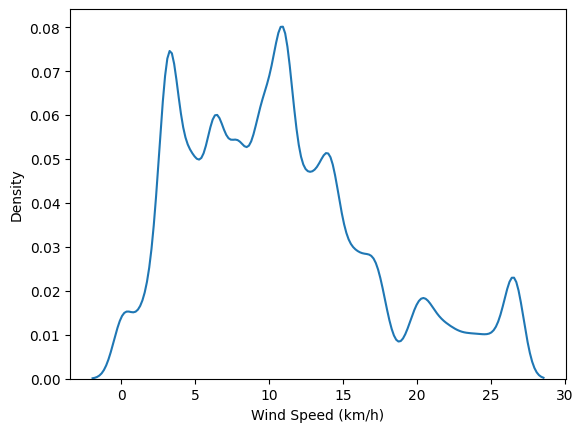

In [53]:
sns.kdeplot(x = df['Wind Speed (km/h)'] , data = df)
plt.show()

>- As we can see, after getting rid of the outliers, a new chart appeared showing us that the wind speed is between 0 and 19

# 7- Wind Bearing (degrees)

In [54]:
df['Wind Bearing (degrees)'].unique()

array([251., 259., 204., 269., 258., 260., 279., 290., 316., 281., 289.,
       262., 288., 230., 163., 139., 147., 160., 152., 150., 149., 180.,
       161., 135., 141., 151., 169., 170., 187., 179., 162., 159., 168.,
        32., 140., 103., 113., 129., 207., 153.,   4., 341.,  15., 348.,
       321., 311., 339., 340., 330.,  19., 277.,   9.,   0., 350., 349.,
       338., 320., 310., 328.,  20.,  28.,  11., 326., 309., 193., 273.,
       300., 307., 319., 318., 243., 177., 172., 142., 130., 359., 166.,
       145., 178., 223., 240., 231., 214., 222., 241., 235., 238., 211.,
       221., 215., 224., 358.,   8.,  59.,  63.,  65., 146., 305., 327.,
       271., 297., 301., 308., 272., 351., 175., 138., 158., 132., 209.,
       250., 295., 280., 270., 239., 242., 266., 278., 325., 282., 274.,
       255.,  46., 284., 283., 313., 345.,  16., 332.,  12.,  39.,   3.,
        33.,  24.,  25.,  31.,  47.,  67.,  60., 144.,  57.,   2.,  18.,
        48.,  29., 335., 228., 315.,  40., 143., 13

In [55]:
check_outliers('Wind Bearing (degrees)', df)

[]

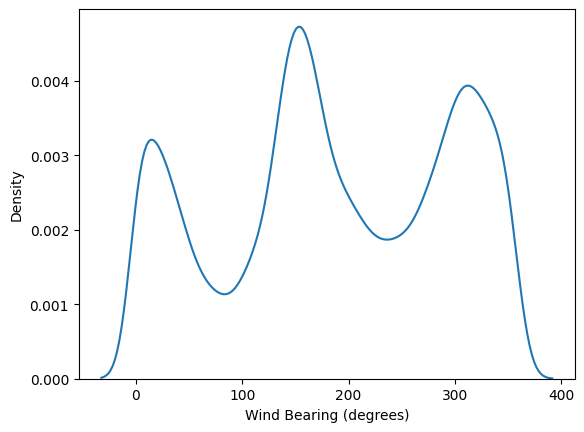

In [56]:
sns.kdeplot( x = df['Wind Bearing (degrees)'] , data =df)
plt.show()

# 8- Visibility (km)

In [57]:
df['Visibility (km)'].unique()

array([1.58263e+01, 1.49569e+01, 9.98200e+00, 1.12056e+01, 1.14471e+01,
       1.12700e+01, 1.10285e+01, 6.19850e+00, 8.05000e+00, 1.03523e+01,
       6.69760e+00, 9.90150e+00, 5.97310e+00, 1.08031e+01, 1.06743e+01,
       1.08192e+01, 1.07548e+01, 1.08997e+01, 1.08514e+01, 1.10768e+01,
       1.08836e+01, 7.61530e+00, 2.65650e+00, 3.81570e+00, 4.49190e+00,
       4.44360e+00, 5.68330e+00, 3.10730e+00, 3.20390e+00, 1.40553e+01,
       6.11800e+00, 6.16630e+00, 7.96950e+00, 6.34340e+00, 1.05455e+01,
       1.49086e+01, 1.50052e+01, 1.58746e+01, 1.00464e+01, 1.00303e+01,
       1.19784e+01, 1.41680e+01, 5.92480e+00, 1.22360e+00, 7.21280e+00,
       1.11251e+01, 1.33791e+01, 1.13988e+01, 1.12861e+01, 1.56975e+01,
       1.48764e+01, 6.84250e+00, 1.53594e+01, 4.29870e+00, 4.12160e+00,
       4.76560e+00, 2.93020e+00, 5.84430e+00, 9.61170e+00, 9.67610e+00,
       2.01250e+00, 5.21640e+00, 1.45866e+01, 1.56009e+01, 1.47154e+01,
       6.11800e-01, 3.63860e+00, 1.11090e+00, 5.15200e-01, 4.347

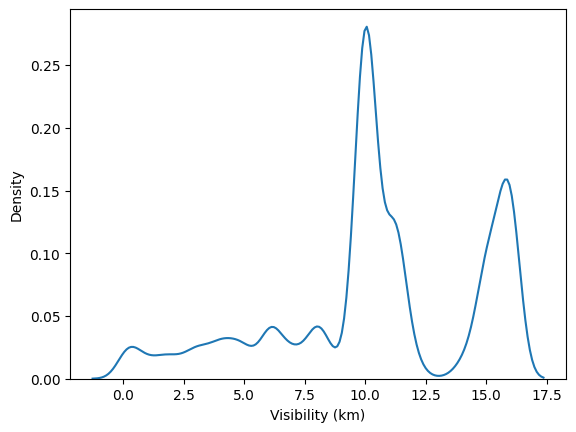

In [58]:
sns.kdeplot(x = df['Visibility (km)'] , data = df) 
plt.show()

In [59]:
check_outliers('Visibility (km)' , df)

[]

In [60]:
df.head()

,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary,Year_Date,month_Date
0,Partly Cloudy,0,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.,2006,4
1,Partly Cloudy,0,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.,2006,4
2,Mostly Cloudy,0,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.,2006,4
3,Partly Cloudy,0,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.,2006,4
4,Mostly Cloudy,0,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.,2006,4


# 9- Loud Cover

In [61]:
df['Loud Cover'].unique()

array([0.])

>- all the values equal 0 so it is  the featuer does not matter

In [62]:
df.drop('Loud Cover' , axis =1 , inplace = True)

In [63]:
df.head()

,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Daily Summary,Year_Date,month_Date
0,Partly Cloudy,0,9.472222,7.388889,0.89,14.1197,251.0,15.8263,1015.13,Partly cloudy throughout the day.,2006,4
1,Partly Cloudy,0,9.355556,7.227778,0.86,14.2646,259.0,15.8263,1015.63,Partly cloudy throughout the day.,2006,4
2,Mostly Cloudy,0,9.377778,9.377778,0.89,3.9284,204.0,14.9569,1015.94,Partly cloudy throughout the day.,2006,4
3,Partly Cloudy,0,8.288889,5.944444,0.83,14.1036,269.0,15.8263,1016.41,Partly cloudy throughout the day.,2006,4
4,Mostly Cloudy,0,8.755556,6.977778,0.83,11.0446,259.0,15.8263,1016.51,Partly cloudy throughout the day.,2006,4


# 10- Pressure (millibars)

In [64]:
df['Pressure (millibars)'].unique()

array([1015.13, 1015.63, 1015.94, ...,  998.11,  998.52,  997.59])

In [65]:
df['Pressure (millibars)'].nunique()

4979

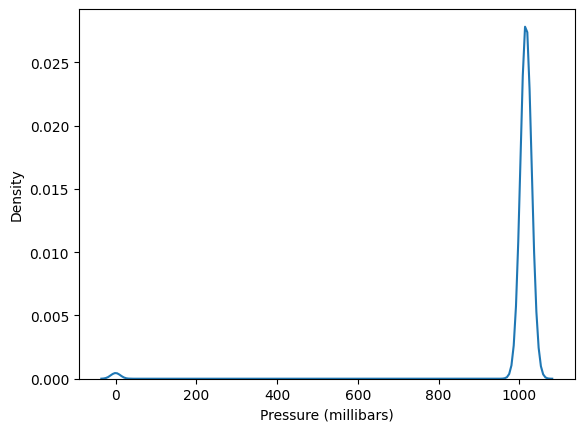

In [66]:
sns.kdeplot(x= df['Pressure (millibars)'], data = df)
plt.show()

In [67]:
check_outliers('Pressure (millibars)' , df)

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1038.06,
 1037.85,
 1037.67,
 1037.47,
 1037.23,
 1037.23,
 1037.36,
 1037.82,
 1037.99,
 1037.93,
 1037.71,
 1037.1,
 1036.65,
 1036.2,
 1035.9,
 1035.71,
 1035.69,
 1035.53,
 1035.61,
 1035.6,
 1035.49,
 1035.22,
 1035.18,
 1035.41,
 1034.92,
 1035.39,
 1035.71,
 1036.02,
 1036.18,
 1036.29,
 1036.63,
 1036.2,
 1036.39,
 1036.19,
 1036.19,
 1036.11,
 1036.66,
 1036.9,
 1037.1,
 1037.5,
 1037.68,
 1037.09,
 1037.04,
 1036.28,
 1036.39,
 1036.54,
 1036.5,
 1036.31,
 1036.54,
 1036.61,
 1036.9,
 1036.96,
 1036.81,
 1037.09,
 1036.79,
 1036.89,
 1036.78,
 1036.69,
 1036.58,
 1036.51,
 1037.1,
 1037.1,
 1037.44,
 0.0,
 0.0,
 1036.13,
 1035.8,
 1035.31,
 1035.35,
 1035.2

In [68]:
handle_outliers('Pressure (millibars)' , df)

In [69]:
check_outliers('Pressure (millibars)' , df)

[]

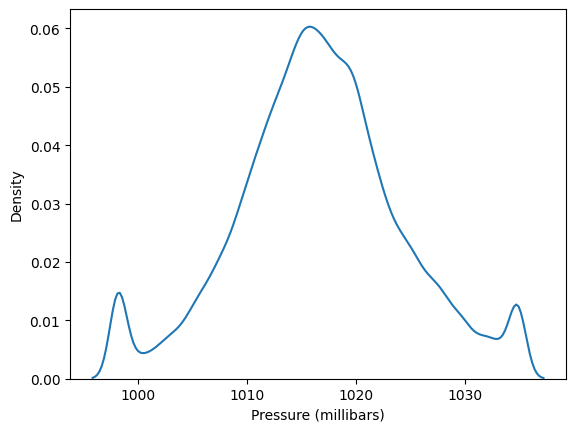

In [70]:
sns.kdeplot(x= df['Pressure (millibars)'], data = df)
plt.show()

# 11- Daily Summary

In [71]:
df['Daily Summary'].unique()

array(['Partly cloudy throughout the day.',
       'Mostly cloudy throughout the day.', 'Foggy in the evening.',
       'Foggy overnight and breezy in the morning.',
       'Overcast throughout the day.', 'Partly cloudy until night.',
       'Mostly cloudy until night.',
       'Foggy starting overnight continuing until morning.',
       'Foggy in the morning.', 'Partly cloudy until evening.',
       'Partly cloudy starting in the morning.',
       'Mostly cloudy starting overnight continuing until night.',
       'Mostly cloudy until evening.',
       'Partly cloudy starting in the morning continuing until evening.',
       'Partly cloudy starting in the afternoon.',
       'Partly cloudy starting overnight.',
       'Partly cloudy until morning.',
       'Partly cloudy starting overnight continuing until night.',
       'Partly cloudy starting in the afternoon continuing until night.',
       'Mostly cloudy starting overnight.',
       'Partly cloudy until afternoon.',
       'Mostly

In [72]:
df.head()

,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Daily Summary,Year_Date,month_Date
0,Partly Cloudy,0,9.472222,7.388889,0.89,14.1197,251.0,15.8263,1015.13,Partly cloudy throughout the day.,2006,4
1,Partly Cloudy,0,9.355556,7.227778,0.86,14.2646,259.0,15.8263,1015.63,Partly cloudy throughout the day.,2006,4
2,Mostly Cloudy,0,9.377778,9.377778,0.89,3.9284,204.0,14.9569,1015.94,Partly cloudy throughout the day.,2006,4
3,Partly Cloudy,0,8.288889,5.944444,0.83,14.1036,269.0,15.8263,1016.41,Partly cloudy throughout the day.,2006,4
4,Mostly Cloudy,0,8.755556,6.977778,0.83,11.0446,259.0,15.8263,1016.51,Partly cloudy throughout the day.,2006,4


In [73]:
df = pd.get_dummies(df,columns=['Summary'],drop_first=True)
df = pd.get_dummies(df,columns=['Daily Summary'],drop_first=True)

In [74]:
df.head()

,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Year_Date,month_Date,...,Daily Summary_Partly cloudy until evening.,Daily Summary_Partly cloudy until morning.,Daily Summary_Partly cloudy until night and breezy in the afternoon.,Daily Summary_Partly cloudy until night and breezy in the morning.,Daily Summary_Partly cloudy until night and breezy starting in the morning continuing until afternoon.,Daily Summary_Partly cloudy until night.,Daily Summary_Rain throughout the day.,Daily Summary_Rain until afternoon.,Daily Summary_Rain until morning.,Daily Summary_Windy in the afternoon.
0,0,9.472222,7.388889,0.89,14.1197,251.0,15.8263,1015.13,2006,4,...,0,0,0,0,0,0,0,0,0,0
1,0,9.355556,7.227778,0.86,14.2646,259.0,15.8263,1015.63,2006,4,...,0,0,0,0,0,0,0,0,0,0
2,0,9.377778,9.377778,0.89,3.9284,204.0,14.9569,1015.94,2006,4,...,0,0,0,0,0,0,0,0,0,0
3,0,8.288889,5.944444,0.83,14.1036,269.0,15.8263,1016.41,2006,4,...,0,0,0,0,0,0,0,0,0,0
4,0,8.755556,6.977778,0.83,11.0446,259.0,15.8263,1016.51,2006,4,...,0,0,0,0,0,0,0,0,0,0
